# SciView

# 1) Digital object identifier (DOI) - filepath dictionaries

A dictionary is created for every directory containing up to 100'000 text files. The dictionary maps the full path, which is the directory and the DOI (filename) as a value to just the doi (filename) as a key. This then allows then the retrieval of a text file based on a DOI.

## 1.1) Libraries and paths

In [8]:
# Load packages
from Functions.F1_Subsets_and_PreProcessing import DOI_Path_Dictionary, Random_DOI_Path_Pair, Dict_Loader
import pickle
import pandas as pd
import gensim

In [9]:
# Define input paths and file names
DataPath="Y:\\Data\\"

# Define Output paths and file names
IntermediateData_Path="Y:\\IntermediateData\\"
doiPath_Suffix="_DOI_Path_Dict.pkl"

# Set the dirs to save doi and paths
StartDir=100
EndDir=199

## Create DOI - filepath dictionaries
Every article text file name is the corresponding DOI of the file itsel. The files are further saved under specific directories and therefore in order to load a specific file via the DOI the full path has to known. The DOI-filepath dictionary store the DOI as a key and the full path as a value.

Depending on the progress the start and end directory has to adapted above, check the values accordingly:

In [10]:
print(StartDir, EndDir)

100 199


In [ ]:
# Iterate trough data directories
for dirNum in range(StartDir,EndDir+1):

    # Bring for example 27 into the form of "027"
    dirNum=str(dirNum).zfill(3)

    # Define Path for saving
    saveName=(IntermediateData_Path + dirNum + doiPath_Suffix).replace(" ","")

    # create a binary pickle file 
    f = open(saveName,"wb")

    # Create dictionary
    doiPathDict=DOI_Path_Dictionary(dirNum, DataPath)

    # write the python object (dict) to pickle file
    pickle.dump(doiPathDict,f)
    
    # close file
    f.close()

## Check integrty of the dict by randomly checking content and doi
Check if the DOI - file path dictionaries are correctly mapped by reading part of the retrieved text and comparing it through a web search of the give DOI

In [2]:
# Define input paths and file names
doiPathDict_Path=("Y:\\DoiPathDicts\\003_DOI_Path_Dict.pkl")

In [3]:
# Load the DOI-Path dictionary
with open(doiPathDict_Path, 'rb') as handle:
    doiPathDict=pickle.load(handle)

# Feed the dictionary to the function which returns a random DOI-Path pair
Random_DOI_Path_Pair(doiPathDict)

The random pair is : ('10.1002/aja.1000750205', 'Y:\\Data\\00300000\\10.1002\\aja.1000750205.txt')
THE RESCTIVXTY OF THE PROSTATE GLAND O F
THE FEMALE RAT IN RELATION TO AGE1
DOROTHY PRICE:
Hiill Zoi


# 2) Preprocess and model building of millions of documents

## 2.1) Libraries and Paths

In [2]:
# Load packages
from Functions.F1_Subsets_and_PreProcessing import Dict_Loader
from Functions.F2_Model_Building import path_creator, log_printer
import pickle
import pandas as pd
import gensim
import time
# import pyLDAvis.gensim_models
import gc
import memory_profiler as mem_profile
import os

In [3]:
# from modelConfig_0_49 import *
# # with open('modelConfig_0_49.py', 'r') as f:
# #     print(f.read())

from modelConfig_0_99 import *
with open('modelConfig_0_99.py', 'r') as f:
    print(f.read())

# Define input paths and file names
#-------------------------------------------
# Input paths
IntermediateData_Path="Y:\\IntermediateData\\"
FtPr_Suffix="_FtPr.pkl"
MetaData_Suffix="_MetaData.pkl"

# Define output path and file names
#-------------------------------------------
# Model_Path="Y:\\Models\\"
sampledDocPath="0_99_10000_sampledDocs.text"
sampledDocBigramPath="0_99_10000_sampledDocsBigram.text"

# Set the dirs to save doi and paths
StartDir=0
EndDir=99

# Sample Parameter
sampleNDocs=10000
randomState=42

# Logfile
LogFilePath="Y:\\Models\\0_99_10000_Sampling_Log.txt"

#------------------------------------------------------------------------------

# Define filters
minTokenN=200
maxTokenN=15000
language="en"

# Filtered meta data
MetaDataFiltered_Suffix="_MetaDataFiltered.pkl"
PreProcessMetaDataSamplePath="Y:\\Models\\0_99_10000_PreProcessMetaData.pkl"

#------------------------------------------------------------------------------

# Define Bigram/Phrase Parameters
bigramM

## 2.2) Preprocess documents
Multiprocessing does not work in jupyter notebook (https://stackoverflow.com/questions/23641475/multiprocessing-working-in-python-but-not-in-ipython/23641560#23641560). Therefore the PreProcessing of the documents is in the **Functions.Preprocess_with_Multiprocessing.py** file

## 2.3) Define meta data filters

In [102]:
dirNum=8

dirNum=str(dirNum).zfill(3)
Meta_Path=(IntermediateData_Path + dirNum + MetaData_Suffix).replace(" ","")
print(Meta_Path)
Meta=pd.read_pickle(Meta_Path)

Y:\MetaData_PreprocessedText\008_MetaData.pkl


In [103]:
Meta.columns

Index(['DOI', 'Token Amount', 'Language'], dtype='object')

In [104]:
Meta["Language"]=[str(languageObject[0]) for languageObject in Meta["Language"]]
Meta["Language"]=Meta["Language"].str.replace('\d+', '')
Meta["Language"]=Meta["Language"].str.replace('.', '')
Meta["Language"]=Meta["Language"].str.replace(':', '')

C:\Users\sebas\anaconda3\envs\SciView\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\sebas\anaconda3\envs\SciView\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes


In [105]:
Meta["Language"].value_counts()

en    78097
de    21816
n        74
ca        6
it        2
sv        1
cy        1
Name: Language, dtype: int64

<AxesSubplot:>

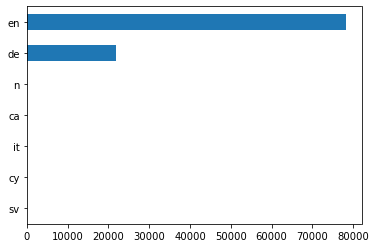

In [106]:
Meta["Language"].value_counts().sort_values().plot(kind = 'barh')

In [107]:
Meta["Token Amount"].max()

90100

<AxesSubplot:>

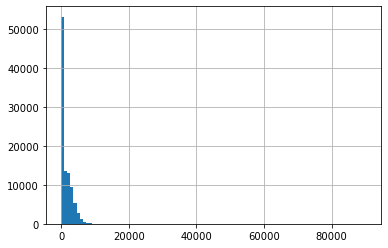

In [108]:
Meta["Token Amount"].hist(bins=100)

<AxesSubplot:>

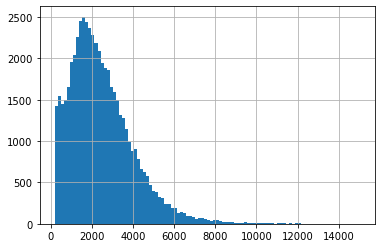

In [109]:
minTokenN=200
maxTokenN=15000
Meta["Token Amount"].hist(bins=100,range=(minTokenN,maxTokenN))

defined filters

In [ ]:
minTokenN=200
maxTokenN=15000
language="en"

## Testing of Dictionary and Phrases Model 

### Check if texts can be added to an existing dictinary

In [12]:
dirNum=0

# Start Global Timer which times the whole function
tic = time.perf_counter()

FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)

#Stop global timer and print
toc = time.perf_counter()
print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))

In [18]:
# Start Global Timer which times the whole function
tic = time.perf_counter()
dct=gensim.corpora.Dictionary(list(FtPr.values()))
#Stop global timer and print
toc = time.perf_counter()
print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))


In [22]:
print(dct.num_docs,len(dct))

99984

In [26]:
dirNum=1

# Start Global Timer which times the whole function
tic = time.perf_counter()

FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)  
dct.add_documents(list(FtPr.values()))

#Stop global timer and print
toc = time.perf_counter()
print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))

Time elapsed in seconds:  800.4948 , in minutes  13.3416 , in hours:  0.2224


In [27]:
print(dct.num_docs,len(dct))

199976

In [29]:
dirNum=2

# Start Global Timer which times the whole function
tic = time.perf_counter()

FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)  
dct.add_documents(list(FtPr.values()))

#Stop global timer and print
toc = time.perf_counter()
print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))

Time elapsed in seconds:  1164.1192 , in minutes  19.402 , in hours:  0.3234


In [32]:
print(dct.num_docs,len(dct))

299975 2269904


### Test if it is faster to merge dictionaries instead of adding documents

In [110]:
dirNum=0
# Start Global Timer which times the whole function
tic = time.perf_counter()
FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix) 
dct=gensim.corpora.Dictionary(list(FtPr.values()))
dirNum=1
FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)  
dct.add_documents(list(FtPr.values()))
print(dct.num_docs,len(dct))
#Stop global timer and print
toc = time.perf_counter()
print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))

199976 2185638
Time elapsed in seconds:  945.4743 , in minutes  15.7579 , in hours:  0.2626


In [111]:
dirNum=0
# Start Global Timer which times the whole function
tic = time.perf_counter()
FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix) 
dct1=gensim.corpora.Dictionary(list(FtPr.values()))
dirNum=1
# Start Global Timer which times the whole function
tic = time.perf_counter()
FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix) 
dct2=gensim.corpora.Dictionary(list(FtPr.values()))
dct1.merge_with(dct2)
print(dct1.num_docs,len(dct1))
#Stop global timer and print
toc = time.perf_counter()
print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))

199976 3426641
Time elapsed in seconds:  1174.3321 , in minutes  19.5722 , in hours:  0.3262


It seems that the output of mergin is a transformer not a dict

### Test if bulding a corpus is faster with a smaller dictionary


In [33]:
dirNum=0

# Start Global Timer which times the whole function
tic = time.perf_counter()

FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)  
corpus = [dct.doc2bow(text) for text in list(FtPr.values())]

#Stop global timer and print
toc = time.perf_counter()
print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))

Time elapsed in seconds:  1643.5739 , in minutes  27.3929 , in hours:  0.4565


In [34]:
print(dct.num_docs,len(dct))

299975 2269904


In [36]:
dct.filter_extremes(keep_n=500000)

In [37]:
print(dct.num_docs,len(dct))

299975 500000


In [38]:
# Start Global Timer which times the whole function
tic = time.perf_counter()

corpus2 = [dct.doc2bow(text) for text in list(FtPr.values())]

#Stop global timer and print
toc = time.perf_counter()
print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))

Time elapsed in seconds:  830.7225 , in minutes  13.8454 , in hours:  0.2308


### Test phrases model with freezing

In [4]:
dirNum=1

# Start Global Timer which times the whole function
tic = time.perf_counter()

FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)  

# Define bigram and Trigram models
bigram = gensim.models.phrases.Phrases(list(FtPr.values()), min_count=3)
# trigram = gensim.models.phrases.Phrases(bigram[list(FtPr.values())], min_count=3)
# tetragram = gensim.models.phrases.Phrases(trigram[list(FtPr.values())], min_count=3)

# Apply the bigram and trigram model to each preprocessed tokenized list
# FtPrNg=[tetragram[trigram[bigram[doc]]] for doc in list(FtPr.values())]
FtPrNg=[bigram[doc] for doc in list(FtPr.values())]

#Stop global timer and print
toc = time.perf_counter()
print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))

Time elapsed in seconds:  2275.3597 , in minutes  37.9227 , in hours:  0.632


In [5]:
print(list(FtPr.values())[0][0:100])

['li', 'chien', 'chen', 'et', 'al', 'effect', 'heat', 'treatment', 'ni', 'au', 'ohmic', 'contact', 'phys', 'stat', 'sol', 'subject', 'classification', 'cg', 'effect', 'heat', 'treatment', 'ni', 'au', 'ohmic', 'contact', 'type', 'gan', 'li', 'chien', 'chen', 'jin', 'kuo', 'ho', 'fu', 'rong', 'chen', 'ji', 'jung', 'kai', 'li', 'chang', 'chang', 'shyang', 'jong', 'chien', 'chiu', 'chao', 'nien', 'huang', 'kwang', 'kuo', 'shih', 'department', 'engineering', 'system', 'science', 'national', 'tsing', 'hua', 'university', 'hsinchu', 'taiwan', 'department', 'material', 'science', 'engineering', 'national', 'chiao', 'tung', 'university', 'hsinchu', 'taiwan', 'opto', 'electronics', 'system', 'laboratory', 'industrial', 'technology', 'research', 'institute', 'chutung', 'hsinchu', 'taiwan', 'received', 'july', 'effect', 'heat', 'treatment', 'temperature', 'microstructure', 'specific', 'contact', 'resistance', 'oxidized', 'ni', 'nm', 'au', 'nm', 'contact', 'type']


In [6]:
print(FtPrNg[0][0:100])

['li', 'chien', 'chen', 'et_al', 'effect', 'heat', 'treatment', 'ni', 'au', 'ohmic_contact', 'phys_stat', 'sol_subject', 'classification', 'cg', 'effect', 'heat', 'treatment', 'ni', 'au', 'ohmic_contact', 'type', 'gan', 'li', 'chien', 'chen_jin', 'kuo', 'ho', 'fu', 'rong_chen', 'ji', 'jung', 'kai', 'li', 'chang_chang', 'shyang', 'jong', 'chien', 'chiu', 'chao', 'nien', 'huang', 'kwang', 'kuo', 'shih', 'department', 'engineering', 'system', 'science', 'national_tsing', 'hua_university', 'hsinchu_taiwan', 'department', 'material', 'science_engineering', 'national_chiao', 'tung_university', 'hsinchu_taiwan', 'opto_electronics', 'system', 'laboratory', 'industrial', 'technology', 'research', 'institute', 'chutung', 'hsinchu_taiwan', 'received_july', 'effect', 'heat', 'treatment', 'temperature', 'microstructure', 'specific', 'contact', 'resistance', 'oxidized', 'ni', 'nm', 'au', 'nm', 'contact', 'type', 'gan', 'wa', 'investigated', 'minimum', 'specific', 'contact', 'resistance', 'rc', 'obta

with freeze

In [3]:
dirNum=1

# Start Global Timer which times the whole function
tic = time.perf_counter()

FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)  

# Define bigram and Trigram models
bigram = gensim.models.phrases.Phrases(list(FtPr.values()), min_count=3)
# trigram = gensim.models.phrases.Phrases(bigram[list(FtPr.values())], min_count=3)
# tetragram = gensim.models.phrases.Phrases(trigram[list(FtPr.values())], min_count=3)

# Freeze Model
frozen_bigram_model = bigram.freeze()
# frozen_trigram_model = trigram.freeze()
# frozen_tetragram_model = tetragram.freeze()

# Apply the bigram and trigram model to each preprocessed tokenized list
# FtToPrNg=[frozen_tetragram_model[frozen_trigram_model[frozen_bigram_model[doc]]] for doc in list(FtPr.values())]
FtToPrNg=[frozen_bigram_model[doc] for doc in list(FtPr.values())]

#Stop global timer and print
toc = time.perf_counter()
print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))

Time elapsed in seconds:  686.8023 , in minutes  11.4467 , in hours:  0.1908


### Test adding new dataset to phrase model

In [3]:
# Start Global Timer which times the whole function
tic = time.perf_counter()

dirNum=0
FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)
FtPr=list(FtPr.values())[0:20000]

# Define bigram and Trigram models
bigram = gensim.models.phrases.Phrases(FtPr, min_count=3)

print(len(bigram.vocab))

dirNum=1
FtPr1=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)  
FtPr1=list(FtPr1.values())[0:20000]

# Define bigram and Trigram models
bigram.add_vocab(FtPr1)

print(len(bigram.vocab))

# Apply the bigram and trigram model to each preprocessed tokenized list
# FtPrNg=[tetragram[trigram[bigram[doc]]] for doc in list(FtPr.values())]
FtPrNg=[bigram[doc] for doc in FtPr]
FtPrNg1=[bigram[doc] for doc in FtPr1]

#Stop global timer and print
toc = time.perf_counter()
print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))

17424778
28701000
Time elapsed in seconds:  565.2361 , in minutes  9.4206 , in hours:  0.157


In [4]:
print(FtPrNg[50][0:100])

['international_journal', 'geriatric_psychiatry', 'vol', 'schizophrenia', 'onset', 'extreme', 'adult', 'life', 'david', 'castle', 'simon', 'wessely', 'robert', 'howard', 'robin', 'murray', 'department', 'psychological_medicine', 'king_college', 'hospital', 'institute_psychiatry', 'london_uk', 'section', 'old_age', 'psychiatry', 'institute_psychiatry', 'london_uk', 'abstract_objective', 'de_ne', 'epidemiology', 'phenomenology', 'premorbid', 'risk_factor', 'patient', 'rst', 'manifestation', 'schizophrenia', 'like', 'illness', 'age_year', 'compare', 'patient', 'onset', 'age_year', 'design', 'setting', 'subject', 'contact', 'non', 'ective_psychotic', 'illness', 'across', 'age_onset', 'ascertained', 'psychiatric', 'case', 'register', 'patient', 'rediagnosed_according', 'operationalized_criterion', 'psychotic_illness', 'early_late', 'onset', 'compared', 'main', 'outcome_measure', 'phenomenological', 'premorbid', 'aetiological', 'parameter', 'compared', 'two', 'group', 'using', 'risk', 'ratio

with freeze

In [5]:
# Start Global Timer which times the whole function
tic = time.perf_counter()

dirNum=0
FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)
FtPr=list(FtPr.values())[0:20000]

# Define bigram and Trigram models
bigram = gensim.models.phrases.Phrases(FtPr, min_count=3)

print(len(bigram.vocab))

dirNum=1
FtPr1=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)  
FtPr1=list(FtPr1.values())[0:20000]

# Define bigram and Trigram models
bigram.add_vocab(FtPr1)

print(len(bigram.vocab))

# Freeze Model
frozen_bigram_model = bigram.freeze()

# Apply the bigram and trigram model to each preprocessed tokenized list
# FtPrNg=[tetragram[trigram[bigram[doc]]] for doc in list(FtPr.values())]
FtPrNg=[frozen_bigram_model[doc] for doc in FtPr]
FtPrNg1=[frozen_bigram_model[doc] for doc in FtPr1]

#Stop global timer and print
toc = time.perf_counter()
print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))

17424778
28701000
Time elapsed in seconds:  760.2073 , in minutes  12.6701 , in hours:  0.2112


In [6]:
print(FtPrNg[50][0:100])

['international_journal', 'geriatric_psychiatry', 'vol', 'schizophrenia', 'onset', 'extreme', 'adult', 'life', 'david', 'castle', 'simon', 'wessely', 'robert', 'howard', 'robin', 'murray', 'department', 'psychological_medicine', 'king_college', 'hospital', 'institute_psychiatry', 'london_uk', 'section', 'old_age', 'psychiatry', 'institute_psychiatry', 'london_uk', 'abstract_objective', 'de_ne', 'epidemiology', 'phenomenology', 'premorbid', 'risk_factor', 'patient', 'rst', 'manifestation', 'schizophrenia', 'like', 'illness', 'age_year', 'compare', 'patient', 'onset', 'age_year', 'design', 'setting', 'subject', 'contact', 'non', 'ective_psychotic', 'illness', 'across', 'age_onset', 'ascertained', 'psychiatric', 'case', 'register', 'patient', 'rediagnosed_according', 'operationalized_criterion', 'psychotic_illness', 'early_late', 'onset', 'compared', 'main', 'outcome_measure', 'phenomenological', 'premorbid', 'aetiological', 'parameter', 'compared', 'two', 'group', 'using', 'risk', 'ratio

## Filtered MetaData files
This only has to be applied if the filtered meta data is not yet created

In [6]:
print(StartDir, EndDir+1)

50 100


Adapt StartDir if necessary

In [5]:
StartDir=50

In [7]:
# Start Global Timer which times the whole function
tic = time.perf_counter()

# Apply the Phrases model
for dirNum in range(StartDir,EndDir+1):
    
    # Load MetaData
    dirNum=str(dirNum).zfill(3)
    Meta_Path=(IntermediateData_Path + dirNum + MetaData_Suffix).replace(" ","")
    Meta=pd.read_pickle(Meta_Path)

    # Filter MetaData
    Meta["Language"]=[str(languageObject[0]) for languageObject in Meta["Language"]]
    Meta["Language"]=Meta["Language"].str.replace('\d+', '', regex=True)
    Meta["Language"]=Meta["Language"].str.replace('.', '', regex=True)
    Meta["Language"]=Meta["Language"].str.replace(':', '', regex=True)

    # Get filtered DOI List
    Meta=Meta[(Meta["Token Amount"] > minTokenN) & (Meta["Token Amount"] < maxTokenN) & (Meta["Language"]==language)]

    # Save the meta data each iteration
    metaDataName=(IntermediateData_Path + dirNum + MetaDataFiltered_Suffix).replace(" ","")
    Meta.to_pickle(metaDataName)

#Stop global timer and print
toc = time.perf_counter()
print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))


Time elapsed in seconds:  44.3733 , in minutes  0.7396 , in hours:  0.0123


## Iterative Approach for Phrase Model, Dictionary, Bow Corpus and LDA Model

### Phrase Model

In [7]:
# Start Global Timer which times the whole function
tic = time.perf_counter()

# Define the name of the logfile
logName=path_creator("log",[Model_Path, StartDir, EndDir, FreezedPhrasesLog_Suffix])

if InterDir != None:
    # Load InterDict
    bigram=gensim.models.phrases.Phrases.load(path_creator("phrasesInterSave",[Model_Path, InterDir-1, StartDir, EndDir, InterSavePhrases_Suffix]))
    log_printer(logName,["interLoad", path_creator("phrasesInterSave",[Model_Path, InterDir-1, StartDir, EndDir, InterSavePhrases_Suffix])])
else:
    # Initiate new Bigram Model
    bigram = gensim.models.phrases.Phrases(min_count=bigramMinFreq, threshold=bigramThreshold, max_vocab_size=phraseVocabSize)

# Print parameters of phrase model
log_printer(logName,["PhraseModelParameters", bigramMinFreq, bigramThreshold, phraseVocabSize])

# Print Memory usage at start
log_printer(logName,["MemoryUsage", "Usage before processing: "])

# Process through directories if an InterDir is defined it starts from there
for dirNum in range(StartDir+InterDir,EndDir+1):

    # Load FilteredMetaData
    Meta=pd.read_pickle(path_creator("meta",[IntermediateData_Path, dirNum, MetaDataFiltered_Suffix]))

    #Load preprocessed full text
    tictic = time.perf_counter()
    FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)
    toctoc = time.perf_counter()
    #Print time usage to log
    log_printer(logName,["ProcessTime","Data of directory: ",dirNum,toctoc-tictic])

    # Apply meta data filter and delet old dataframe
    FtPrFi=[FtPr[DOI] for DOI in list(Meta["DOI"])]
    # Check if apllying the filter worked
    log_printer(logName,["MetaFilter",len(FtPr),len(FtPrFi)])

    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage before deleting FtPr: "])
    del FtPr
    gc.collect
    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage after deleting FtPr: "])

    #Load preprocessed full text
    tictic = time.perf_counter()
    # Update the Phrase Model
    bigram.add_vocab(FtPrFi)
    toctoc = time.perf_counter()
    #Print time usage to log
    log_printer(logName,["ProcessTime","Updating of biram model with directory: ",dirNum,toctoc-tictic])
    # log updated bigram
    log_printer(logName,["BigramUpdate",len(bigram.vocab)])

    # Save interim progress if specific dirs are processed
    if dirNum==24 or dirNum==49:
        bigram.save(path_creator("phrasesInterSave",[Model_Path, dirNum, StartDir, EndDir, InterSavePhrases_Suffix]))

    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage before deleting FtPrFi: "])
    # Delete loaded lists
    del(FtPrFi)
    gc.collect()
    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage after deleting FtPrFi: "])

    # Print iteration separator
    log_printer(logName,["iterNext"])

# Freeze Model
frozen_bigram_model = bigram.freeze()

# Save Model
frozen_bigram_model.save(path_creator("phraseModel",[Model_Path, StartDir, EndDir, FreezedPhrases_Suffix]))

#Stop global timer and print
toc = time.perf_counter()
log_printer(logName,["FinalProcessTime","Total processing time took: ",toc-tic])

An intermediate saved phrase model is loaded from:  Y:\Models\024_(000_049)_InterSaveBigram.pkl
-------------------------------------------------------
Phrase Model Parameters:  10 10 400000000
Usage before processing:  [16727.02734375] Mb
Data of directory:  25  is loaded/processed... in seconds:  55.035 , in minutes  0.9173 , in hours:  0.0153
Num of Docs before/after filtering:  99999  /  95245
Usage before deleting FtPr:  [17714.11328125] Mb
Usage after deleting FtPr:  [17480.60546875] Mb
Updating of biram model with directory:  25  is loaded/processed... in seconds:  583.175 , in minutes  9.7196 , in hours:  0.162
Updated Bigram Vocab is:  180316524
Usage before deleting FtPrFi:  [18835.52734375] Mb
Usage after deleting FtPrFi:  [24683.15234375] Mb
-------------------------------------------------------
Data of directory:  26  is loaded/processed... in seconds:  34.5759 , in minutes  0.5763 , in hours:  0.0096
Num of Docs before/after filtering:  100000  /  94401
Usage before dele

In [ ]:
# # Start Global Timer which times the whole function
# tic = time.perf_counter()

# # Load Bigram Model
# bigram = gensim.models.phrases.Phrases(min_count=bigramMinFreq, threshold=bigramThreshold, max_vocab_size=phraseVocabSize)

# # Define saveName for the Log file
# saveName=(Model_Path + str(StartDir).zfill(3) + "_" + str(EndDir).zfill(3) + FreezedPhrasesLog_Suffix).replace(" ","")

# # Print model parameters for log file
# print("Phrase Model Parameters: ", bigramMinFreq, bigramThreshold, phraseVocabSize,file=open(saveName,'a'))
# print("Phrase Model Parameters: ", bigramMinFreq, bigramThreshold, phraseVocabSize)

# # Create phrases model
# for dirNum in range(StartDir,EndDir+1):

#     # Load FilteredMetaData
#     dirNum=str(dirNum).zfill(3)
#     Meta_Path=(IntermediateData_Path + dirNum + MetaDataFiltered_Suffix).replace(" ","")
#     Meta=pd.read_pickle(Meta_Path)

#     #Load preprocessed full text
#     tictic = time.perf_counter()
#     FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)
#     toctoc = time.perf_counter()

#     print("Data of directory: ",dirNum, " is loaded... in seconds: ", round(toctoc-tictic,4), ", in minutes ",
#         round((toctoc-tictic)/60,4), ", in hours: ", round((toctoc-tictic)/3600,4),file=open(saveName,'a'))
#     print("Data of directory: ",dirNum, " is loaded... in seconds: ", round(toctoc-tictic,4), ", in minutes ", 
#         round((toctoc-tictic)/60,4), ", in hours: ", round((toctoc-tictic)/3600,4))
    
#     # Apply filter and delet old dataframe
#     FtPrFi=[FtPr[DOI] for DOI in list(Meta["DOI"])]

#     # Check if apllying the filter worked
#     print("Num of Docs before/after filtering: ", len(FtPr), " / ", len(FtPrFi),file=open(saveName,'a'))
#     print("Num of Docs before/after filtering: ", len(FtPr), " / ", len(FtPrFi))
#     del FtPr
#     gc.collect

#     # Update the Phrase Model
#     bigram.add_vocab(FtPrFi)

#     print("Updated Bigram Vocab is: ",len(bigram.vocab),file=open(saveName,'a'))
#     print("Updated Bigram Vocab is: ",len(bigram.vocab))

#     # #---------------------------------------------------------------------------------------------------------------
#     # # Check if new vocab is added through the counting of bigrams (If vocab is updated it shoud be the same)
#     # AllBigrams=[len([b for b in bigram[sent] if b.count('_') == 1]) for sent in FtPrFi[0:10000]]

#     # print("Bigram count of ", dirNum, " is ", sum(AllBigrams), "(Calculated for 10000 docs at each iteration)",file=open(saveName,'a'))
#     # print("Bigram count of ", dirNum, " is ", sum(AllBigrams), "(Calculated for 10000 docs at each iteration)")

#     # # Check if new vocab is added through the phasegrams dict of the freezed model
#     # bigram_freezed = bigram.freeze()

#     # print("Amount of phrasegrams in freezed bigram model: ",len(bigram_freezed.phrasegrams),file=open(saveName,'a'))
#     # print("-------------------------------------------------------",file=open(saveName,'a'))
#     # print("Amount of phrasegrams in freezed bigram model: ",len(bigram_freezed.phrasegrams))
#     print("-------------------------------------------------------")
#     # #---------------------------------------------------------------------------------------------------------------

#     # Delete loaded lists
#     # print("Director number: ",dirNum," is processed and now deleted")
#     del(FtPrFi)
#     gc.collect()

# # Freeze Model
# frozen_bigram_model = bigram.freeze()

# #Stop global timer and print
# toc = time.perf_counter()
# print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))
# print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4),file=open(saveName,'a'))

# # Save Model
# saveName=(Model_Path + str(StartDir).zfill(3) + "_" + str(EndDir).zfill(3) + FreezedPhrases_Suffix).replace(" ","")
# print(saveName)
# frozen_bigram_model.save(saveName)

### Dictionary

In [5]:
# Start Global Timer which times the whole function
tic = time.perf_counter()

# Define the name of the logfile
logName=path_creator("log",[Model_Path, StartDir, EndDir, DictionaryLog_Suffix])

# Load the phrases model
bigram=gensim.models.phrases.Phrases.load(path_creator("phraseModel",[Model_Path, StartDir, EndDir, FreezedPhrases_Suffix]))

#Intialize dictinary and docAmount counter
dct=gensim.corpora.Dictionary(prune_at=dictVocab)

# Print parameters of Dictionary
log_printer(logName,["DictionaryParameters", dictVocab])

# Apply the Phrases model
for dirNum in range(StartDir,EndDir+1):

    # Load FilteredMetaData
    Meta=pd.read_pickle(path_creator("meta",[IntermediateData_Path, dirNum, MetaDataFiltered_Suffix]))

    #Load preprocessed full text
    tictic = time.perf_counter()
    FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)
    toctoc = time.perf_counter()
    #Print time usage to log
    log_printer(logName,["ProcessTime","Data of directory: ",dirNum,toctoc-tictic])

    # Apply meta data filter and delet old dataframe
    FtPrFi=[FtPr[DOI] for DOI in list(Meta["DOI"])]
    # Check if apllying the filter worked
    log_printer(logName,["MetaFilter",len(FtPr),len(FtPrFi)])

    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage before deleting FtPr: "])
    del FtPr
    gc.collect
    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage after deleting FtPr: "])

    # Apply the Phrase Model
    tictic = time.perf_counter()
    FtPrFiNg=bigram[FtPrFi]
    toctoc = time.perf_counter()
    #Print time usage to log
    log_printer(logName,["ProcessTime","Bigram model with FtPriFi of directory:  ",dirNum,toctoc-tictic])

    
    # Add documents to the dictionary
    tictic = time.perf_counter()
    dct.add_documents(FtPrFiNg,prune_at=dictVocab)
    toctoc = time.perf_counter()
    #Print time usage to log
    log_printer(logName,["ProcessTime","Document vocab is added from directory: ",dirNum,toctoc-tictic])
    # Print dict update stats
    log_printer(logName,["DictAddDocs",dct.num_docs, len(dct),dct.num_pos])

    # Print iteration separator
    log_printer(logName,["iterNext"])

# Save dict
dct.save(path_creator("dictionary",[Model_Path, StartDir, EndDir, Dictionary_Suffix]))

# Print and log dicitonary stats before filter
log_printer(logName,["DictFiltBefore", len(dct),filter_freq])

# Remove words with frequency lower than 2
dct.filter_extremes(no_below=filter_freq, keep_n=None)

# Print and log dicitonary stats after filter
log_printer(logName,["DictFiltAfter", len(dct)])

# Save filtered dict
dct.save(path_creator("dictionary",[Model_Path, StartDir, EndDir, DictionaryFiltered_Suffix]))

#Stop global timer and print
toc = time.perf_counter()
log_printer(logName,["FinalProcessTime","Total processing time took: ",toc-tic])

The dictionary has max vocab of:  60000000
Data of directory:  0  is applied/loaded/processed... in seconds:  144.0323 , in minutes  2.4005 , in hours:  0.04
Num of Docs before/after filtering:  99984  /  97802
Usage before deleting FtPr:  [19645.625] Mb
Usage after deleting FtPr:  [19547.61328125] Mb
Bigram model with FtPriFi of directory:   0  is applied/loaded/processed... in seconds:  0.0005 , in minutes  0.0 , in hours:  0.0
Document vocab is added from directory:  0  is applied/loaded/processed... in seconds:  511.8726 , in minutes  8.5312 , in hours:  0.1422
Data of directory:  1  is applied/loaded/processed... in seconds:  133.8587 , in minutes  2.231 , in hours:  0.0372
Num of Docs before/after filtering:  99992  /  93368
Usage before deleting FtPr:  [26114.3671875] Mb
Usage after deleting FtPr:  [25902.0703125] Mb
Bigram model with FtPriFi of directory:   1  is applied/loaded/processed... in seconds:  117.5325 , in minutes  1.9589 , in hours:  0.0326
Document vocab is added f

### Bow Corpus

In [5]:
# Start Global Timer which times the whole function
tic = time.perf_counter()

# Define the name of the logfile
logName=path_creator("log",[Model_Path, StartDir, EndDir, BowCorpusLog_Suffix])

# Load the phrases model
bigram=gensim.models.phrases.Phrases.load(path_creator("phraseModel",[Model_Path, StartDir, EndDir, FreezedPhrases_Suffix]))

# Load filtered dictionary
dct=gensim.corpora.Dictionary.load(path_creator("dictionary",[Model_Path, StartDir, EndDir, DictionaryFiltered_Suffix]))

# Create new bow corpus directory
path = path_creator("bowCorpusDirectory",[IntermediateData_Path, StartDir, EndDir])
isExist = os.path.exists(path)
if not isExist:
  os.makedirs(path)
  print("New directory has been created successfully!")
else:
    print('Directory already exists with that name!')


# Apply the Phrases model
for dirNum in range(StartDir,EndDir+1):

    # Load FilteredMetaData
    Meta=pd.read_pickle(path_creator("meta",[IntermediateData_Path, dirNum, MetaDataFiltered_Suffix]))

    #Load preprocessed full text
    tictic = time.perf_counter()
    FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)
    toctoc = time.perf_counter()
    #Print time usage to log
    log_printer(logName,["ProcessTime","Data of directory: ",dirNum,toctoc-tictic])

    # Apply meta data filter and delete old dataframe
    FtPrFi=[FtPr[DOI] for DOI in list(Meta["DOI"])]
    # Check if apllying the filter worked
    log_printer(logName,["MetaFilter",len(FtPr),len(FtPrFi)])

    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage before deleting FtPr: "])
    del FtPr
    gc.collect
    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage after deleting FtPr: "])

    # Apply the Phrase Model
    tictic = time.perf_counter()
    FtPrFiNg=bigram[FtPrFi]
    toctoc = time.perf_counter()
    #Print time usage to log
    log_printer(logName,["ProcessTime","Bigram model with FtPriFi of directory:  ",dirNum,toctoc-tictic])

    #Load preprocessed full text
    tictic = time.perf_counter()
    # Create corpus    
    bowCorpus=[dct.doc2bow(doc, allow_update=False) for doc in FtPrFiNg]
    #Save Corpus
    gensim.corpora.MmCorpus.serialize(path_creator("bowCorpus",[IntermediateData_Path, dirNum, StartDir, EndDir, BowCorpus_Suffix]), bowCorpus)
    toctoc = time.perf_counter()
    log_printer(logName,["ProcessTime","Corpus with FtPriFiNg of directory:  ",dirNum,toctoc-tictic])

    # Print corpus update stats
    log_printer(logName,["newCorpusDoc",len(bowCorpus),  len(FtPrFiNg)])

    # Print iteration separator
    log_printer(logName,["iterNext"])

#Stop global timer and print
toc = time.perf_counter()
log_printer(logName,["FinalProcessTime","Total processing time took: ",toc-tic])

Length of Dict before filtering:  45266564  Filtering with min freq of:  10
Length of Dict after filtering:  5868827
Data of directory:  0  is applied/loaded/processed... in seconds:  130.1417 , in minutes  2.169 , in hours:  0.0362
Num of Docs before/after filtering:  99984  /  97802
Usage before deleting FtPr:  [19797.9765625] Mb
Usage after deleting FtPr:  [19738.8671875] Mb
Bigram model with FtPriFi of directory:   0  is applied/loaded/processed... in seconds:  0.0033 , in minutes  0.0001 , in hours:  0.0
Corpus with FtPriFiNg of directory:   0  is applied/loaded/processed... in seconds:  610.2956 , in minutes  10.1716 , in hours:  0.1695
BoW Corpus Length:  97802  Num of processed Documents:  97802
-------------------------------------------------------
Data of directory:  1  is applied/loaded/processed... in seconds:  346.3318 , in minutes  5.7722 , in hours:  0.0962
Num of Docs before/after filtering:  99992  /  93368
Usage before deleting FtPr:  [23150.43359375] Mb
Usage after 

### LDA

In [6]:
# Start Global Timer which times the whole function
tic = time.perf_counter()

# Define the name of the logfile
logName=path_creator("log",[Model_Path, StartDir, EndDir,  LDALog_Suffix]) # Single Core
# logName=path_creator("log",[Model_Path, StartDir, EndDir,  LDAMultiLog_Suffix]) # Multi Core

# Load dictionary
dct=gensim.corpora.Dictionary.load(path_creator("dictionary",[Model_Path, StartDir, EndDir, DictionaryFiltered_Suffix]))

# Print and log dicitonary stats after filter
log_printer(logName,["DictFiltAfter", len(dct)])

# # Initiate LDA Model
ldaModel= gensim.models.ldamodel.LdaModel(id2word=dct, num_topics=nTopics) # Single Core
# ldaModel=gensim.models.LdaMulticore(id2word=dct, num_topics=nTopics, workers=4) # Multi Core

# Iterate through documents and create bow corpus
for dirNum in range(StartDir,EndDir+1):

    # Load Bow Corpus    
    tictic = time.perf_counter()
    bowCorpus=gensim.corpora.MmCorpus(path_creator("bowCorpus",[IntermediateData_Path, dirNum, StartDir, EndDir, BowCorpus_Suffix]))
    toctoc = time.perf_counter()
    log_printer(logName,["ProcessTime","Load corpus of directory:  ",dirNum,toctoc-tictic])

    # Updating LDA model
    tictic = time.perf_counter()
    ldaModel.update(bowCorpus)
    toctoc = time.perf_counter()
    log_printer(logName,["ProcessTime","LDA model updated with corpus of dir:  ",dirNum,toctoc-tictic])

    # Print iteration separator
    log_printer(logName,["iterNext"])

# Save LDA Model
ldaModel.save(path_creator("ldaModel",[Model_Path, dirNum, StartDir, EndDir, LDA_Suffix])) # Single Core
# ldaModel.save(path_creator("ldaModel",[Model_Path, dirNum, StartDir, EndDir, LDAMulti_Suffix])) # Multi Core

#Stop global timer and print
toc = time.perf_counter()
log_printer(logName,["FinalProcessTime","Total processing time took: ",toc-tic])

Length of Dict after filtering:  5868827
Load corpus of directory:   0  is applied/loaded/processed... in seconds:  0.7756 , in minutes  0.0129 , in hours:  0.0002
LDA model updated with corpus of dir:   0  is applied/loaded/processed... in seconds:  976.9208 , in minutes  16.282 , in hours:  0.2714
-------------------------------------------------------
Load corpus of directory:   1  is applied/loaded/processed... in seconds:  0.2903 , in minutes  0.0048 , in hours:  0.0001
LDA model updated with corpus of dir:   1  is applied/loaded/processed... in seconds:  876.3992 , in minutes  14.6067 , in hours:  0.2434
-------------------------------------------------------
Load corpus of directory:   2  is applied/loaded/processed... in seconds:  0.4167 , in minutes  0.0069 , in hours:  0.0001
LDA model updated with corpus of dir:   2  is applied/loaded/processed... in seconds:  822.7727 , in minutes  13.7129 , in hours:  0.2285
-------------------------------------------------------
Load corp

Traceback (most recent call last):
  File "C:\Users\sebas\anaconda3\envs\SciView\lib\multiprocessing\queues.py", line 238, in _feed
    send_bytes(obj)
  File "C:\Users\sebas\anaconda3\envs\SciView\lib\multiprocessing\connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "C:\Users\sebas\anaconda3\envs\SciView\lib\multiprocessing\connection.py", line 280, in _send_bytes
    ov, err = _winapi.WriteFile(self._handle, buf, overlapped=True)
OSError: [WinError 1450] Insufficient system resources exist to complete the requested service


KeyboardInterrupt: 

## Streaming and sampling approach for phrase model, dictionary, BoW corpus and LDA

# 3) Inspect Dictionary and LDA model

In [3]:
import gensim
from Functions.F2_Model_Building import path_creator

In [5]:
# # Define input paths and file names
IntermediateData_Path="Y:\\IntermediateData\\"
# FtPr_Suffix="_FtPr.pkl"
# MetaData_Suffix="_MetaData.pkl"

# Define output path and file names
Model_Path="Y:\\Models\\"
# # Phrases Bigram
# InterSavePhrases_Suffix="_InterSaveBigram.pkl"
# FreezedPhrases_Suffix="_FreezedBigram.pkl"
# FreezedPhrasesLog_Suffix="_FreezedBigramLog.txt"
# Filtered meta data
MetaDataFiltered_Suffix="_MetaDataFiltered.pkl"
# Dictionary
Dictionary_Suffix="_Dictionary"
DictionaryLog_Suffix="_DictionaryLog.txt"
# #Bow Corpus
# BowCorpus_Suffix="_BowCorpus.mm"
# BowCorpusLog_Suffix="_BowCorpusLog.txt"
# LDA
LDA_Suffix="_LDA.model"
LDALog_Suffix="_LDALog.txt"
# #pyLDAvis
# pyLDAvis_Suffix="_pyLDAvis.html"

# Define filters
minTokenN=200
maxTokenN=15000
language="en"

# Define Bigram/Phrase Parameters
bigramMinFreq=10
bigramThreshold=10
phraseVocabSize=400000000
InterDir=25 # Else None

# Define Dictionary Parameters
dictVocab=60000000
filter_freq=10

# Define LDA Parameters
nTopics=50

# Set the dirs to save doi and paths
StartDir=0
EndDir=49

## Inspect LDA Model

Load Data

In [6]:
ldaModel=gensim.models.LdaModel.load(path_creator("ldaModel",[Model_Path, StartDir, EndDir, LDA_Suffix]))

In [7]:
ldaModel.get_topic_terms(49, topn=10)

[(630, 0.1447978),
 (4014, 0.082529694),
 (750, 0.05273371),
 (4430, 0.049176764),
 (3222, 0.03889558),
 (483, 0.029007148),
 (42, 0.026837647),
 (693, 0.024881952),
 (8293, 0.022647828),
 (439, 0.016011156)]

In [8]:
ldaModel.print_topics(-1,num_words=10)

[(0,
  '0.114*"group" + 0.028*"risk" + 0.019*"age" + 0.019*"year" + 0.014*"difference" + 0.012*"factor" + 0.011*"health" + 0.010*"exposure" + 0.010*"population" + 0.009*"total"'),
 (1,
  '0.029*"energy" + 0.018*"state" + 0.010*"field" + 0.009*"phys_rev" + 0.009*"magnetic" + 0.009*"physic" + 0.009*"electron" + 0.008*"phys" + 0.008*"density" + 0.008*"transition"'),
 (2,
  '0.082*"see" + 0.026*"li" + 0.025*"wang" + 0.019*"chen" + 0.018*"zhang" + 0.017*"lee" + 0.015*"liu" + 0.011*"yang" + 0.011*"china" + 0.010*"wu"'),
 (3,
  '0.037*"tissue" + 0.035*"cancer" + 0.029*"skin" + 0.027*"tumor" + 0.021*"bone" + 0.016*"liver" + 0.012*"lesion" + 0.011*"tumour" + 0.011*"ultrasound" + 0.009*"lung"'),
 (4,
  '0.020*"parameter" + 0.015*"distribution" + 0.011*"error" + 0.010*"probability" + 0.008*"set" + 0.008*"estimate" + 0.008*"average" + 0.007*"variable" + 0.007*"factor" + 0.007*"size"'),
 (5,
  '0.051*"water" + 0.022*"soil" + 0.021*"rock" + 0.014*"area" + 0.010*"site" + 0.010*"pore" + 0.009*"surface

Load a document and infer the topic of this document then check if the output makes sense

# 4) Inspect reference databases

Use a unfiltered metadata dataframe and search through the the json file with mutiprocessing

## Libraries and Paths

In [ ]:
import jsonlines
import time
import pandas as pd
import os
import regex as re

logEntries=int(1e5) # Intervall of loging
path='Y:\\Reference_Databases\\unpaywall\\splitted'

## Process unpaywall dataset

Unziped the paywall file on the synology, then used the split command from wsl
    
    split -l 1000000 unpaywall_snapshot_2021-07-02T151134.jsonl

Create a the following directory

    'Y:\\Reference_Databases\\unpaywall\\splitted'

And move all of splitted file into this directory

In [ ]:
fileNameList=os.listdir(path)

for name in fileNameList:
    if ".pkl" in name or ".jsonl" in name or ".gz" in name or ".json.gz" in name:
        fileNameList.remove(name)
        print(name, "is removed")

for fileName in fileNameList:
    filepath= path+ fileName
    tic1 = time.perf_counter()
    tic2 = time.perf_counter()
    tic3 = time.perf_counter()
    list_of_dfs=[]
    df = pd.DataFrame(columns=["doi","year",'is_oa','publisher','journal_name'])
    with jsonlines.open(filepath) as f:
        for index, item in enumerate(f):
                # print(item.keys())
                if (index+1) % logEntries == 0: # example log every 100000 lines (100000 entries = 0:999999 python index)
                    toc2 = time.perf_counter()
                    print('index = {}'.format(index)," | df appending time in minutes: ",(toc2-tic2)/60, " | Length of list of dfs: ", len(list_of_dfs))
                    tic2 = time.perf_counter()
                try:
                    df = pd.DataFrame(columns=["doi","year",'is_oa','publisher','journal_name'])
                    data={"doi":item["doi"], 'genre':item['genre'],"year":item['year'],'title':item['title'],
                                "is_oa":item['is_oa'], "publisher":item['publisher'], "journal_name":item['journal_name']}
                    df=df.append(data,ignore_index=True)
                    list_of_dfs.append(df)
                except:
                    print(index, " could not be processed")

    print("------------------")
    print("Saving to disk")
    df = pd.concat(list_of_dfs, ignore_index=True)
    df.to_pickle(path + fileName +".pkl")
    list_of_dfs=[]
    toc3 = time.perf_counter()
    timediff=(toc3-tic3)/60
    print("Processing time in minutes: ", timediff)
    tic3 = time.perf_counter()


## Concatenate meta data files

In [ ]:
# Get a list off all the unpaywall metadata .pkl files
fileNameList=os.listdir(path)
for name in fileNameList:
    if ".pkl" not in name:
        fileNameList.remove(name)
        print(name, "is removed")

# Concatenate all metadata files
tic = time.perf_counter()
df=pd.concat([pd.read_pickle(path+name) for name in fileNameList], ignore_index=True)
toc = time.perf_counter()
print(toc-tic)

# Save the dataframe 
saveName='Y:\\Reference_Databases\\unpaywall\\' + fileNameList[0] + "-" + fileNameList[-1] + ".pkl"

# Save the dataframe to a pickle file
df.to_pickle(saveName)

## Search and Match the preprocessing meta data and reference database meta data

# List of words to remove

In [ ]:
"et"
"al"
"la"
"de"
"ch"
"ii"
"university"
"th"

### Jupyter Dash
Installatio according to:
https://dash.plotly.com/installation

In [2]:
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output# Load Data

In [ ]:
df = px.data.tips()# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )# Run app and display result inline in the notebook
app.run_server(mode='inline')

In [9]:
app = JupyterDash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

app.run_server(mode='inline')